In [1]:
# Libraries

import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()
import os
import sys
import matplotlib.pyplot as plt
import geopandas as gpd
from pyproj import Proj, transform
import math
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# files read

athens = pd.read_csv('listings.csv')
thess= pd.read_csv('listings_thes.csv')
cret= pd.read_csv('listings_crete.csv')
galazies_simaies= pd.read_excel('galazies_simaies_2010.xls')
top_10=pd.read_csv('top10.txt')

#preprocessing crete

#χωρίζω σε 4 νομούς τα καταλυματα
loc=pd.DataFrame(cret)
xania=pd.DataFrame(columns=['id','host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','NOMOS','galazia_paralia'])
reth=pd.DataFrame(columns=['id','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','NOMOS','galazia_paralia'])
irak=pd.DataFrame(columns=['id','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','NOMOS','galazia_paralia'])
las=pd.DataFrame(columns=['id','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','last_review','reviews_per_month','calculated_host_listings_count','availability_365','NOMOS','galazia_paralia'])
xania_1=['Αποκορώνου','Γαύδου','Καντάνου - Σέλινου','Κισσάμου','Πλατανιά','Σφακίων','Χανίων']
reth_1=['Αγίου Βασιλείου','Αμάριου','Ανωγείων','Μυλοποτάμου','Ρεθύμνης']
irak_1=['Αρχανών - Αστερουσίων','Βιάννου','Γόρτυνας','Ηρακλείου','Μινώα Πεδιάδας','Μαλεβιζίου','Φαιστού','Χερσονήσου']
las_1=['Αγίου Νικολάου','Ιεράπετρας','Οροπεδίου Λασιθίου','Σητείας']

k=range(len(loc.index))
for i in k:
    if ((loc.at[i ,'neighbourhood']) in xania_1 ) :
        xania=xania.append({'NOMOS': 'ΧΑΝΙΩΝ', 'id':loc.at[i,'id'],'host_id':loc.at[i,'host_id'],'neighbourhood_group':loc.at[i,'neighbourhood_group'],'neighbourhood':loc.at[i,'neighbourhood'],'latitude':loc.at[i,'latitude'],'longitude':loc.at[i,'longitude'],'room_type':loc.at[i,'room_type'],'price':loc.at[i,'price'],'minimum_nights':loc.at[i,'minimum_nights'],'number_of_reviews':loc.at[i,'number_of_reviews'],'last_review':loc.at[i,'last_review'],'reviews_per_month':loc.at[i,'reviews_per_month'],'calculated_host_listings_count':loc.at[i,'calculated_host_listings_count'],'availability_365':loc.at[i,'availability_365']}, ignore_index=True)
    elif ((loc.at[i ,'neighbourhood'])in las_1) :
        las=las.append({'NOMOS': 'ΛΑΣΙΘΙΟΥ', 'id':loc.at[i,'id'],'host_id':loc.at[i,'host_id'],'neighbourhood_group':loc.at[i,'neighbourhood_group'],'neighbourhood':loc.at[i,'neighbourhood'],'latitude':loc.at[i,'latitude'],'longitude':loc.at[i,'longitude'],'room_type':loc.at[i,'room_type'],'price':loc.at[i,'price'],'minimum_nights':loc.at[i,'minimum_nights'],'number_of_reviews':loc.at[i,'number_of_reviews'],'last_review':loc.at[i,'last_review'],'reviews_per_month':loc.at[i,'reviews_per_month'],'calculated_host_listings_count':loc.at[i,'calculated_host_listings_count'],'availability_365':loc.at[i,'availability_365']}, ignore_index=True)    
    elif ((loc.at[i ,'neighbourhood'])in irak_1) :
        irak=irak.append({'NOMOS': 'ΗΡΑΚΛΕΙΟΥ', 'id':loc.at[i,'id'],'host_id':loc.at[i,'host_id'],'neighbourhood_group':loc.at[i,'neighbourhood_group'],'neighbourhood':loc.at[i,'neighbourhood'],'latitude':loc.at[i,'latitude'],'longitude':loc.at[i,'longitude'],'room_type':loc.at[i,'room_type'],'price':loc.at[i,'price'],'minimum_nights':loc.at[i,'minimum_nights'],'number_of_reviews':loc.at[i,'number_of_reviews'],'last_review':loc.at[i,'last_review'],'reviews_per_month':loc.at[i,'reviews_per_month'],'calculated_host_listings_count':loc.at[i,'calculated_host_listings_count'],'availability_365':loc.at[i,'availability_365']}, ignore_index=True)
    elif ((loc.at[i ,'neighbourhood']) in reth_1) :
        reth=reth.append({'NOMOS': 'ΡΕΘΥΜΝΗΣ', 'id':loc.at[i,'id'],'host_id':loc.at[i,'host_id'],'neighbourhood_group':loc.at[i,'neighbourhood_group'],'neighbourhood':loc.at[i,'neighbourhood'],'latitude':loc.at[i,'latitude'],'longitude':loc.at[i,'longitude'],'room_type':loc.at[i,'room_type'],'price':loc.at[i,'price'],'minimum_nights':loc.at[i,'minimum_nights'],'number_of_reviews':loc.at[i,'number_of_reviews'],'last_review':loc.at[i,'last_review'],'reviews_per_month':loc.at[i,'reviews_per_month'],'calculated_host_listings_count':loc.at[i,'calculated_host_listings_count'],'availability_365':loc.at[i,'availability_365']}, ignore_index=True)
    
#παραλιες με γαλαζια σημαια αναλογα με τον νομο
xania_blue=pd.DataFrame(columns=['NOMOS','LATITUDE','LONGITUDE'])
reth_blue=pd.DataFrame(columns=['NOMOS','LATITUDE','LONGITUDE'])
irak_blue=pd.DataFrame(columns=['NOMOS','LATITUDE','LONGITUDE'])
las_blue=pd.DataFrame(columns=['NOMOS','LATITUDE','LONGITUDE'])


loc1=pd.DataFrame(galazies_simaies)
z=range(len(loc1.index))
for i in z:
    if ((loc1.at[i ,'NOMOS'])=='ΧΑΝΙΩΝ') :
        xania_blue=xania_blue.append({'NOMOS': 'ΧΑΝΙΩΝ', 'LATITUDE': loc1.at[i,'LATITUDE'] , 'LONGITUDE': loc1.at[i,'LONGITUDE']}, ignore_index=True)
    elif ((loc1.at[i ,'NOMOS'])=='ΛΑΣΙΘΙΟΥ') :
        las_blue=las_blue.append({'NOMOS': 'ΛΑΣΙΘΙΟΥ', 'LATITUDE': loc1.at[i,'LATITUDE'] , 'LONGITUDE': loc1.at[i,'LONGITUDE']}, ignore_index=True)    
    elif ((loc1.at[i ,'NOMOS'])=='ΗΡΑΚΛΕΙΟΥ') :
        irak_blue=irak_blue.append({'NOMOS': 'ΗΡΑΚΛΕΙΟΥ', 'LATITUDE': loc1.at[i,'LATITUDE'] , 'LONGITUDE': loc1.at[i,'LONGITUDE']}, ignore_index=True)
    elif ((loc1.at[i ,'NOMOS'])=='ΡΕΘΥΜΝΗΣ') :
        reth_blue=reth_blue.append({'NOMOS': 'ΡΕΘΥΜΝΗΣ', 'LATITUDE': loc1.at[i,'LATITUDE'] , 'LONGITUDE': loc1.at[i,'LONGITUDE']}, ignore_index=True)





In [2]:
# σε κάθε dataframe-νομού θα προσθέσω μια στήλη gal-paralia όπου θα έχει την απόσταση του καταλύματος από την πλησιέστερη παραλία 
# θα χρησιμοποιηθεί Haversine formula για τον υπολογισμό απόστασης σε km γιατί έχουμε γεωγραφικές συντεταγμένες

k=range(len(xania.index))
n=range(len(xania_blue.index))
gal=[]
for i in k:
    min=0;
    for j in n:
        lax1=(xania.at[i,'latitude'])*math.pi/180;
        long1=(xania.at[i,'longitude'])*math.pi/180;
        lax2=(xania_blue.at[j,'LATITUDE'])*math.pi/180;
        long2=(xania_blue.at[j,'LONGITUDE'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    gal.append(min)
xania['galazia_paralia']=gal
#print(xania.head)

In [3]:
#rethymno
k=range(len(reth.index))
n=range(len(reth_blue.index))
gal=[]
for i in k:
    min=0;
    for j in n:
        lax1=(reth.at[i,'latitude'])*math.pi/180;
        long1=(reth.at[i,'longitude'])*math.pi/180;
        lax2=(reth_blue.at[j,'LATITUDE'])*math.pi/180;
        long2=(reth_blue.at[j,'LONGITUDE'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    gal.append(min)
reth['galazia_paralia']=gal

In [4]:
#irakleio
k=range(len(irak.index))
n=range(len(irak_blue.index))
gal=[]
for i in k:
    min=0;
    for j in n:
        lax1=(irak.at[i,'latitude'])*math.pi/180;
        long1=(irak.at[i,'longitude'])*math.pi/180;
        lax2=(irak_blue.at[j,'LATITUDE'])*math.pi/180;
        long2=(irak_blue.at[j,'LONGITUDE'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    gal.append(min)
irak['galazia_paralia']=gal

In [5]:
#lasithi
k=range(len(las.index))
n=range(len(las_blue.index))
gal=[]
for i in k:
    min=0;
    for j in n:
        lax1=(las.at[i,'latitude'])*math.pi/180;
        long1=(las.at[i,'longitude'])*math.pi/180;
        lax2=(las_blue.at[j,'LATITUDE'])*math.pi/180;
        long2=(las_blue.at[j,'LONGITUDE'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    gal.append(min)
las['galazia_paralia']=gal

In [6]:
top10=pd.DataFrame(top_10)
crete = pd.concat([xania,reth,irak,las],ignore_index=True)

In [7]:
#βαζω τοπ 10 στο dataframe crete
k=range(len(crete.index))
n=range(len(top_10.index))
top=[]
for i in k:
    min=0;
    for j in n:
        lax1=(crete.at[i,'latitude'])*math.pi/180;
        long1=(crete.at[i,'longitude'])*math.pi/180;
        lax2=(top_10.at[j,'x'])*math.pi/180;
        long2=(top_10.at[j,'y'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    top.append(min)
crete['top-10']=top

In [8]:
#preprocessing για την Θεσσαλονίκη
loc_thes = gpd.read_file('C:/Users/IOANNIS/Desktop/ergiasia/.sho/poi_thessalonikis.shp',encoding='cp1253')
loc_2=pd.DataFrame(loc_thes)
#print(len(thes_1.index))
#thes_1.head(260)
thes_1=pd.DataFrame(columns=['gid','namegrk','point_x','point_y','x','y'])
mouseio ="Μουσείο";
#βρίσκω τα μουσεία στην πόλη της Θεσσαλονίκης
index=range(len(loc_2.index))
for i in index:
    if (mouseio in (loc_2.at[i,'namegrk']) and (loc_2.at[i,'point_x'] != 0) ):
        inProj = Proj('epsg:2100')
        outProj = Proj('epsg:4326')
        x1,y1 = loc_2.at[i,'point_x'],loc_2.at[i,'point_y'];
        x2,y2 = transform(inProj,outProj,x1,y1)
        thes_1=thes_1.append({'gid':loc_2.at[i,'gid'] ,'namegrk':loc_2.at[i,'namegrk'],'point_x':loc_2.at[i,'point_x'],'point_y':loc_2.at[i,'point_y'] ,'x':x2 ,'y':y2},ignore_index= True)

        
from pyproj import Proj, transform

In [9]:
#προσθέτω στο DataFrame την ελαχιστη απόσταση από τα μουσεία και το top 10
top_10=pd.read_csv('top10.txt')

thess= pd.read_csv('listings_thes.csv')
thes=pd.DataFrame(thess)
thess.head
k=range(len(thess.index))
n=range(len(thes_1.index))
museums=[]
for i in k:
    min=0;
    for j in n:
        lax1=(thes.at[i,'latitude'])*math.pi/180;
        long1=(thes.at[i,'longitude'])*math.pi/180;
        lax2=(thes_1.at[j,'x'])*math.pi/180;
        long2=(thes_1.at[j,'y'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    museums.append(min)

top10=pd.DataFrame(top_10)    
m=range(len(top10.index))
top=[]
for i in k:
    min=0;
    for j in m:
        lax1=(thes.at[i,'latitude'])*math.pi/180;
        long1=(thes.at[i,'longitude'])*math.pi/180;
        lax2=(top10.at[j,'x'])*math.pi/180;
        long2=(top10.at[j,'y'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    top.append(min)

thes['Μουσεία']=museums
thes['top-10']=top

In [10]:
#preprocessing για την Αθήνα
loc_athens = pd.read_csv('metro.txt')
loc_2=pd.DataFrame(loc_athens)
ath = pd.read_csv('listings.csv')
athens=pd.DataFrame(ath)
ath_1=pd.DataFrame(columns=['fid','name','lines','eidos','x','y'])
index=range(len(loc_2.index))
for i in index:
        inProj = Proj('epsg:2100')
        outProj = Proj('epsg:4326')
        x1,y1 = loc_2.at[i,'x_g'],loc_2.at[i,'y_g'];
        x2,y2 = transform(inProj,outProj,x1,y1)
        ath_1=ath_1.append({'fid':loc_2.at[i,'fid'] ,'name':loc_2.at[i,'name'],'lines':loc_2.at[i,'lines'],'eidos':loc_2.at[i,'eidos'] ,'x':x2 ,'y':y2},ignore_index= True)

In [11]:
#πρροσθέτω την ελάχιστη απόσταση από τα top10 και από στάση μετρό και τοποθετώ τα καταλύματα σε ποιο διαμέρισμα της Αθήνας ανήκουν
k=range(len(athens.index))
n=range(len(ath_1.index))

metro=[]
for i in k:
    min=0;
    for j in n:
        lax1=(athens.at[i,'latitude'])*math.pi/180;
        long1=(athens.at[i,'longitude'])*math.pi/180;
        lax2=(ath_1.at[j,'x'])*math.pi/180;
        long2=(ath_1.at[j,'y'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    metro.append(min)
top_10=pd.read_csv('top10.txt')
top10=pd.DataFrame(top_10)    
m=range(len(top10.index))
top=[]
for i in k:
    min=0;
    for j in m:
        lax1=(athens.at[i,'latitude'])*math.pi/180;
        long1=(athens.at[i,'longitude'])*math.pi/180;
        lax2=(top10.at[j,'x'])*math.pi/180;
        long2=(top10.at[j,'y'])*math.pi/180;
        dla=lax1-lax2;
        dlong=long1-long2;
        a = math.pow(math.sin((dla)/2),2) + math.cos(lax1)*math.cos(lax2) * math.pow(math.sin(dlong/2),2);
        c = 2*math.atan2(math.sqrt(a),math.sqrt(1-a));
        x=dlong*math.cos((lax1+lax2)/2);
        y=dla;
        R=6371; # Earth radius
        dist=R*c;
        if (dist<min or min==0) : #Haversine distance
            min=dist;
    top.append(min)

athens['metro']=metro
athens['top-10']=top

In [12]:
diamer=pd.read_csv('diamerismata.txt')
w=range(len(diamer.index))
d=[]
for i in k:
    for j in w:
        if (athens.at[i,'neighbourhood']==diamer.at[j,'Περιοχή']):
            d.append(diamer.at[j,'Διαμέρισμα'])
athens['Δημοτικό Διαμέρισμα']=d

In [13]:
#preprocessing για την Ελλάδα
athens['NOMOS'] = ['ΑΤΤΙΚΗΣ'] * len(ath.index)
thes['NOMOS'] = ['ΘΕΣΣΑΛΟΝΙΚΗΣ'] * len(thes.index)
greece = pd.concat([athens,thes,crete])

greece.drop('name', axis='columns', inplace=True)
greece.drop('neighbourhood_group', axis='columns', inplace=True)
greece.drop('host_name', axis='columns', inplace=True)
greece.drop('Μουσεία', axis='columns', inplace=True)
greece.drop('galazia_paralia', axis='columns', inplace=True)
greece.drop('metro', axis='columns', inplace=True)
greece.drop('Δημοτικό Διαμέρισμα', axis='columns', inplace=True)

athens.drop('name', axis='columns', inplace=True)
athens.drop('neighbourhood_group', axis='columns', inplace=True)
athens.drop('host_name', axis='columns', inplace=True)

xania.drop('neighbourhood_group', axis='columns', inplace=True)

irak.drop('neighbourhood_group', axis='columns', inplace=True)
irak.drop('host_name', axis='columns', inplace=True)

las.drop('neighbourhood_group', axis='columns', inplace=True)
las.drop('host_name', axis='columns', inplace=True)

reth.drop('neighbourhood_group', axis='columns', inplace=True)
reth.drop('host_name', axis='columns', inplace=True)

crete.drop('neighbourhood_group', axis='columns', inplace=True)
crete.drop('host_name', axis='columns', inplace=True)
#greece.head(20000)
greece.describe()


,latitude,longitude,reviews_per_month,top-10
count,29601.000000,29601.000000,21907.000000,29601.000000
mean,36.626944,24.182535,1.022158,7.573162
std,1.700171,0.752269,1.335910,10.412882
min,34.834420,22.894960,0.010000,0.003429
25%,35.339410,23.727700,0.180000,0.631737
50%,35.512740,23.961870,0.520000,2.247747
75%,37.977910,24.590430,1.270000,11.516122
max,40.688390,26.277830,14.210000,54.727854


In [14]:
logprice = [math.log(x) for x in greece['price']]
#ax = sns.violinplot(x="room_type", y="logprice" ,data=ath)
greece['logprice']=logprice
greece['price'] = greece['price'].astype('float')
greece['availability_365'] = greece['availability_365'].astype('int')
greece['calculated_host_listings_count'] = greece['calculated_host_listings_count'].astype('int')
greece.describe()

,latitude,longitude,price,reviews_per_month,calculated_host_listings_count,availability_365,top-10,logprice
count,29601.000000,29601.000000,29601.000000,21907.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,36.626944,24.182535,123.787102,1.022158,14.261849,250.888112,7.573162,4.194017
std,1.700171,0.752269,471.061723,1.335910,32.484490,118.680398,10.412882,0.837741
min,34.834420,22.894960,8.000000,0.010000,1.000000,0.000000,0.003429,2.079442
25%,35.339410,23.727700,38.000000,0.180000,1.000000,174.000000,0.631737,3.637586
50%,35.512740,23.961870,57.000000,0.520000,3.000000,295.000000,2.247747,4.043051
75%,37.977910,24.590430,100.000000,1.270000,8.000000,362.000000,11.516122,4.605170
max,40.688390,26.277830,20653.000000,14.210000,190.000000,365.000000,54.727854,9.935616


<AxesSubplot:xlabel='room_type', ylabel='logprice'>

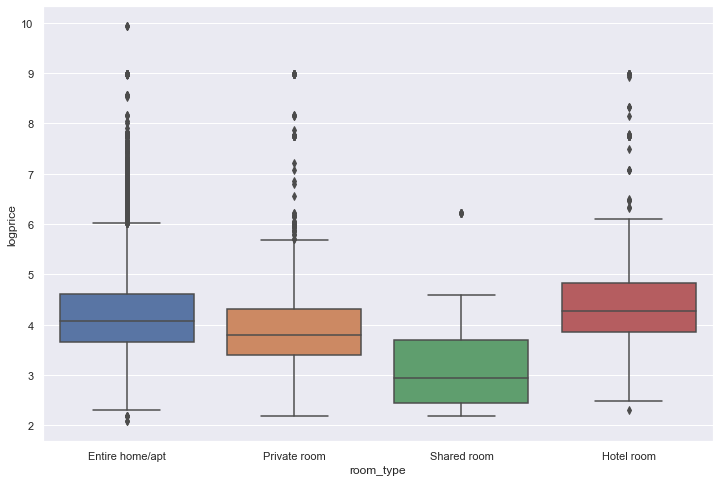

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="room_type", y="logprice", data=greece)

<AxesSubplot:xlabel='NOMOS', ylabel='logprice'>

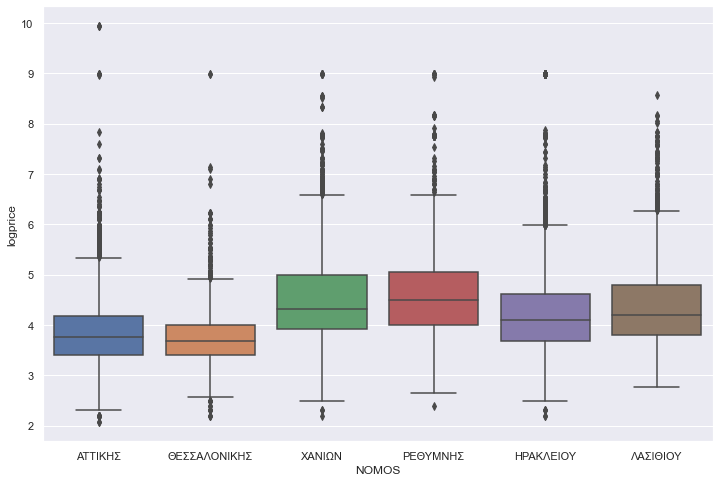

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="NOMOS", y="logprice", data=greece)

In [17]:
greece[['room_type','price']].groupby('room_type').median()

,price
room_type,
Entire home/apt,59.0
Hotel room,72.0
Private room,45.0
Shared room,19.0


In [18]:
greece[['room_type','price']].groupby('room_type').mean()

,price
room_type,
Entire home/apt,114.012201
Hotel room,405.716396
Private room,149.360253
Shared room,79.758242


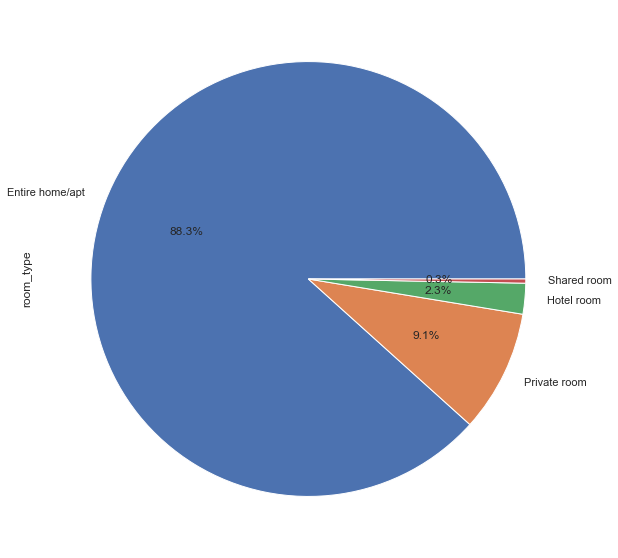

In [19]:
greece['room_type'].value_counts().plot(kind='pie',figsize=(10, 10), autopct='%1.1f%%')
plt.show()

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

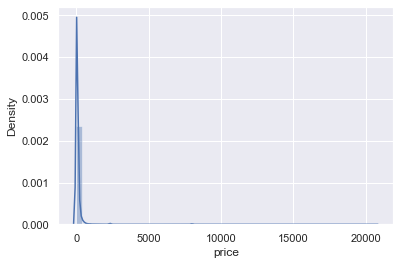

In [20]:
sns.distplot(greece['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

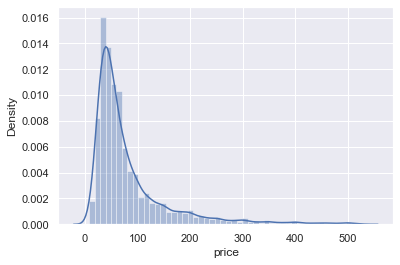

In [21]:
q = greece['price'].quantile(0.98)
data_1 = greece[greece.price < q].copy()


sns.distplot(data_1['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logprice', ylabel='Density'>

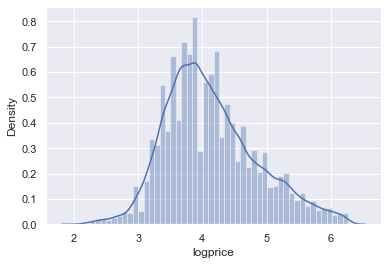

In [22]:
logprice = [math.log(x) for x in data_1['price']]
data_1['logprice']=logprice
sns.distplot(data_1['logprice'])

In [23]:
#βρίσκω τις ενδιάμεσες τιμές των καταλυμάτων ανά νομό
print(xania['price'].median(),reth['price'].median(),las['price'].median(),irak['price'].median(),crete['price'].median())
print(xania['price'].mean(),reth['price'].mean(),las['price'].mean(),irak['price'].mean(),crete['price'].mean())
xania['price'] = xania['price'].astype('float')
xania.describe()

75.0 90.0 66.0 60.0 71.0
155.46396280031 164.77645727221278 143.58294062205468 178.47109356860923 161.49562270545044


,latitude,longitude,price,reviews_per_month,galazia_paralia
count,7742.000000,7742.000000,7742.000000,5587.000000,7742.000000
mean,35.474009,23.972111,155.463963,0.594612,4.284157
std,0.078507,0.189256,376.410001,0.686970,5.285490
min,34.834420,23.529640,9.000000,0.010000,0.006774
25%,35.451733,23.857280,50.000000,0.140000,0.990585
50%,35.507860,24.013355,75.000000,0.370000,2.241727
75%,35.516190,24.088195,146.000000,0.810000,4.741840
max,35.593770,24.320120,8000.000000,8.140000,57.977670


In [24]:
reth['price'] = reth['price'].astype('float')
reth.describe()

,latitude,longitude,price,reviews_per_month,galazia_paralia
count,3534.000000,3534.000000,3534.000000,2458.000000,3534.000000
mean,35.321511,24.535371,164.776457,0.483092,4.267269
std,0.083819,0.116030,479.246814,0.594086,3.940047
min,35.095200,24.284810,11.000000,0.010000,0.043027
25%,35.302698,24.461595,55.000000,0.120000,1.188263
50%,35.359710,24.506885,90.000000,0.300000,2.852100
75%,35.369130,24.599535,155.000000,0.620000,6.553033
max,35.424620,24.893540,8000.000000,8.920000,18.640707


In [25]:
las['price'] = las['price'].astype('float')
las.describe()

,latitude,longitude,price,reviews_per_month,galazia_paralia
count,2122.000000,2122.000000,2122.000000,1479.000000,2122.000000
mean,35.152158,25.821894,143.582941,0.499844,2.759568
std,0.096500,0.195133,298.359715,0.591593,3.661034
min,34.996840,25.433340,16.000000,0.010000,0.027482
25%,35.041960,25.713290,45.000000,0.120000,0.568150
50%,35.179680,25.736785,66.000000,0.300000,1.152210
75%,35.215705,25.968892,120.000000,0.660000,3.209471
max,35.336810,26.277830,5290.000000,5.590000,17.118057


In [26]:
irak['price'] = irak['price'].astype('float')
irak.describe()

,latitude,longitude,price,reviews_per_month,galazia_paralia
count,4307.000000,4307.000000,4307.000000,3040.000000,4307.000000
mean,35.258718,25.151770,178.471094,0.702224,7.030966
std,0.130702,0.204926,782.240894,0.924351,7.470715
min,34.929190,24.734370,9.000000,0.010000,0.016175
25%,35.232870,25.025445,40.000000,0.150000,3.069105
50%,35.316420,25.135190,60.000000,0.400000,4.439858
75%,35.335590,25.345020,100.000000,0.860000,8.455982
max,35.416150,25.534480,8000.000000,12.300000,40.126676


In [27]:
logprice = [math.log(x) for x in crete['price']]
crete['logprice']=logprice
crete['availability_365'] = crete['availability_365'].astype('int')
crete['calculated_host_listings_count'] = crete['calculated_host_listings_count'].astype('int')
crete['price']=crete['price'].astype('float')
crete.describe()

,latitude,longitude,price,reviews_per_month,calculated_host_listings_count,availability_365,galazia_paralia,top-10,logprice
count,17705.000000,17705.000000,17705.000000,12564.000000,17705.000000,17705.000000,17705.000000,17705.000000,17705.000000
mean,35.352622,24.593212,161.495623,0.587677,18.062073,251.821802,4.766260,12.057218,4.446782
std,0.151546,0.677743,517.111466,0.730047,39.363626,115.550343,5.689914,11.435507,0.862560
min,34.834420,23.529640,9.000000,0.010000,1.000000,0.000000,0.006774,0.003429,2.197225
25%,35.283350,24.019650,46.000000,0.130000,1.000000,179.000000,1.052524,3.096158,3.828641
50%,35.364390,24.474090,71.000000,0.360000,3.000000,274.000000,2.812682,9.718715,4.262680
75%,35.500630,25.131840,136.000000,0.760000,9.000000,363.000000,5.955812,16.999132,4.912655
max,35.593770,26.277830,8000.000000,12.300000,190.000000,365.000000,57.977670,54.727854,8.987197


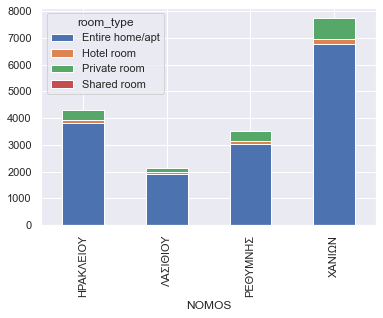

In [28]:
crete.groupby(['NOMOS','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

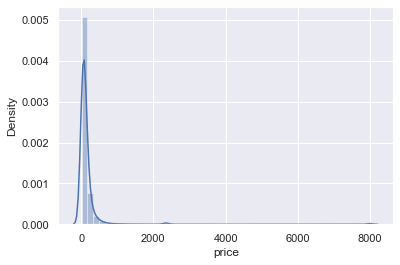

In [29]:
sns.distplot(crete['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

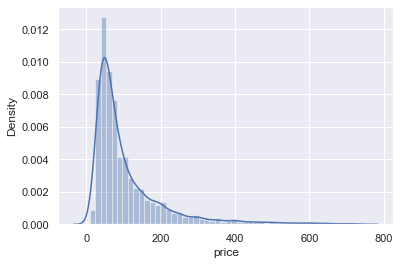

In [30]:
#briskoume apo to grafhma thn timh pou einai sto 99% kathws einai ektos oriwn
q = crete['price'].quantile(0.98)
data_1 = crete[crete.price < q].copy()


sns.distplot(data_1['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logprice', ylabel='Density'>

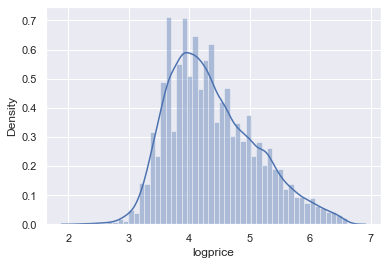

In [32]:
logprice = [math.log(x) for x in data_1['price']]
data_1['logprice']=logprice
sns.distplot(data_1['logprice'])

<AxesSubplot:xlabel='room_type', ylabel='logprice'>

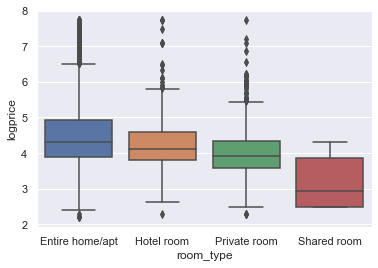

In [32]:
sns.boxplot(x="room_type", y="logprice", data=data_1)

<AxesSubplot:xlabel='NOMOS', ylabel='logprice'>

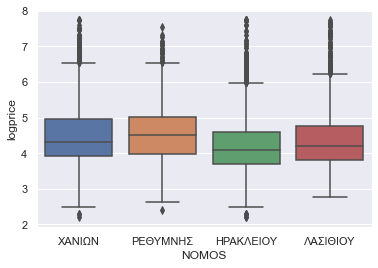

In [33]:
sns.boxplot(x="NOMOS", y="logprice", data=data_1)

In [34]:
logprice = [math.log(x) for x in athens['price']]
athens['logprice']=logprice
athens['availability_365'] = athens['availability_365'].astype('int')
athens['calculated_host_listings_count'] = athens['calculated_host_listings_count'].astype('int')
athens['price']=athens['price'].astype('float')
athens.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,metro,top-10,logprice
count,9.455000e+03,9.455000e+03,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000,7272.000000,9455.000000,9455.000000,9455.000000,9455.000000,9455.000000
mean,2.864946e+07,1.318461e+08,37.980053,23.731778,70.141195,3.433633,37.427922,1.637207,9.449709,254.109572,0.449764,0.853416,3.835086
std,1.146347e+07,1.025103e+08,0.013405,0.012365,416.017364,17.893770,64.294023,1.735093,17.541995,121.661204,0.287380,0.653693,0.651451
min,1.059500e+04,3.717700e+04,37.949280,23.697320,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.002720,0.017649,2.079442
25%,2.105441e+07,3.509330e+07,37.969140,23.724050,30.000000,1.000000,1.000000,0.340000,1.000000,168.000000,0.249676,0.409217,3.401197
50%,3.002726e+07,1.197957e+08,37.978410,23.729940,43.000000,2.000000,9.000000,1.000000,2.000000,316.000000,0.377218,0.653444,3.761200
75%,3.786253e+07,2.154966e+08,37.988160,23.738025,65.000000,2.000000,46.000000,2.400000,8.000000,360.000000,0.571218,1.104055,4.174387
max,4.603472e+07,3.730263e+08,38.034560,23.789530,20653.000000,1000.000000,714.000000,14.210000,101.000000,365.000000,2.002011,5.121329,9.935616


In [35]:
logprice = [math.log(x) for x in thes['price']]
thes['logprice']=logprice
thes['availability_365'] = thes['availability_365'].astype('int')
thes['calculated_host_listings_count'] = thes['calculated_host_listings_count'].astype('int')
thes['price']=thes['price'].astype('float')
thes.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Μουσεία,top-10,logprice
count,2.441000e+03,2.441000e+03,0.0,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2071.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,2.992306e+07,1.511034e+08,NaN,40.628672,22.949787,58.073331,3.378533,34.503892,1.498344,5.337567,231.637853,0.813902,1.077872,3.750959
std,1.105068e+07,1.030073e+08,NaN,0.019217,0.017495,235.179474,15.720252,56.597566,1.541229,9.595505,127.369921,1.255992,1.335547,0.558465
min,3.526100e+04,1.208150e+05,NaN,40.554680,22.894960,9.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.002969,0.010741,2.197225
25%,2.189440e+07,5.311878e+07,NaN,40.619390,22.941420,30.000000,1.000000,2.000000,0.380000,1.000000,118.000000,0.213887,0.328960,3.401197
50%,3.170143e+07,1.463098e+08,NaN,40.633570,22.948420,40.000000,2.000000,13.000000,1.000000,2.000000,266.000000,0.359806,0.510242,3.688879
75%,3.922430e+07,2.367181e+08,NaN,40.639380,22.954680,55.000000,2.000000,40.000000,2.030000,5.000000,358.000000,0.740507,1.217116,4.007333
max,4.603885e+07,3.730006e+08,NaN,40.688390,23.100180,8000.000000,365.000000,502.000000,11.100000,55.000000,365.000000,11.692516,10.813272,8.987197


In [36]:
athens[['Δημοτικό Διαμέρισμα','price']].groupby('Δημοτικό Διαμέρισμα').mean()

,price
Δημοτικό Διαμέρισμα,
1ο,75.682381
2ο,74.229615
3ο,84.997992
4ο,51.790637
5ο,43.397638
6ο,42.323873
7ο,46.759076


In [37]:
athens[['Δημοτικό Διαμέρισμα','price']].groupby('Δημοτικό Διαμέρισμα').median()

,price
Δημοτικό Διαμέρισμα,
1ο,50.0
2ο,40.0
3ο,41.0
4ο,33.0
5ο,31.5
6ο,32.0
7ο,39.0


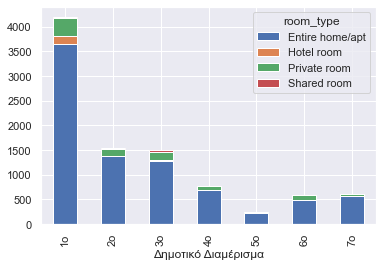

In [38]:
athens.groupby(['Δημοτικό Διαμέρισμα','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

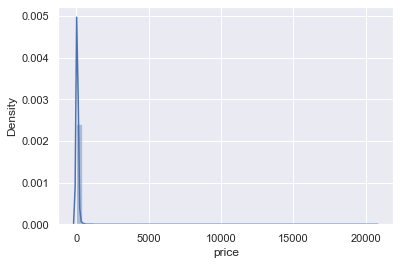

In [33]:
sns.distplot(athens['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

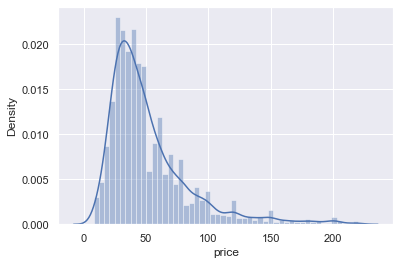

In [34]:
q = athens['price'].quantile(0.98)
data_1 = athens[athens.price < q].copy()


sns.distplot(data_1['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logprice', ylabel='Density'>

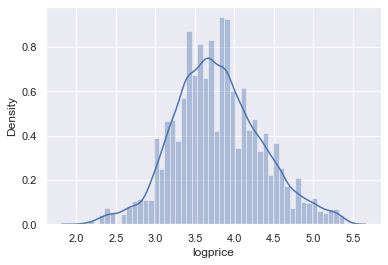

In [37]:
logprice = [math.log(x) for x in data_1['price']]

data_1['logprice']=logprice
sns.distplot(data_1['logprice'])

<AxesSubplot:xlabel='Δημοτικό Διαμέρισμα', ylabel='logprice'>

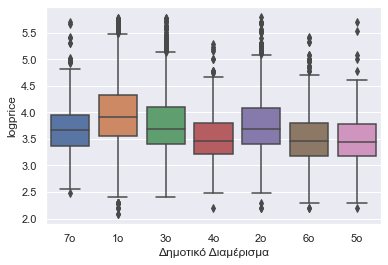

In [42]:
sns.boxplot(x="Δημοτικό Διαμέρισμα", y="logprice", data=data_1)

In [38]:
logprice = [math.log(x) for x in thes['price']]
thes['logprice']=logprice
thes['availability_365'] = thes['availability_365'].astype('int')
thes['calculated_host_listings_count'] = thes['calculated_host_listings_count'].astype('int')
thes['price']=thes['price'].astype('float')
thes.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Μουσεία,top-10,logprice
count,2.441000e+03,2.441000e+03,0.0,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2071.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000
mean,2.992306e+07,1.511034e+08,NaN,40.628672,22.949787,58.073331,3.378533,34.503892,1.498344,5.337567,231.637853,0.813902,1.077872,3.750959
std,1.105068e+07,1.030073e+08,NaN,0.019217,0.017495,235.179474,15.720252,56.597566,1.541229,9.595505,127.369921,1.255992,1.335547,0.558465
min,3.526100e+04,1.208150e+05,NaN,40.554680,22.894960,9.000000,1.000000,0.000000,0.020000,1.000000,0.000000,0.002969,0.010741,2.197225
25%,2.189440e+07,5.311878e+07,NaN,40.619390,22.941420,30.000000,1.000000,2.000000,0.380000,1.000000,118.000000,0.213887,0.328960,3.401197
50%,3.170143e+07,1.463098e+08,NaN,40.633570,22.948420,40.000000,2.000000,13.000000,1.000000,2.000000,266.000000,0.359806,0.510242,3.688879
75%,3.922430e+07,2.367181e+08,NaN,40.639380,22.954680,55.000000,2.000000,40.000000,2.030000,5.000000,358.000000,0.740507,1.217116,4.007333
max,4.603885e+07,3.730006e+08,NaN,40.688390,23.100180,8000.000000,365.000000,502.000000,11.100000,55.000000,365.000000,11.692516,10.813272,8.987197


In [39]:
thes[["neighbourhood", "price"]].groupby("neighbourhood").mean()

,price
neighbourhood,
Ampelokipon – Menemeni,36.256410
Kalamaria,55.321429
Kordelio – Evosmos,54.000000
Neapolis – Sykeon,39.015625
Pavlou Mela,46.444444
Pilea – Chortiatis,114.202532
Thessaloniki,57.368166


In [40]:
thes[["neighbourhood", "price"]].groupby("neighbourhood").median()

,price
neighbourhood,
Ampelokipon – Menemeni,32.0
Kalamaria,47.5
Kordelio – Evosmos,36.5
Neapolis – Sykeon,32.0
Pavlou Mela,37.5
Pilea – Chortiatis,50.0
Thessaloniki,40.0


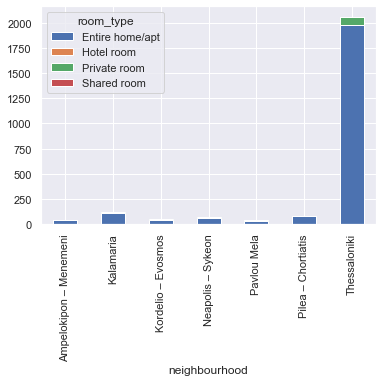

In [41]:
thes.groupby(['neighbourhood','room_type']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

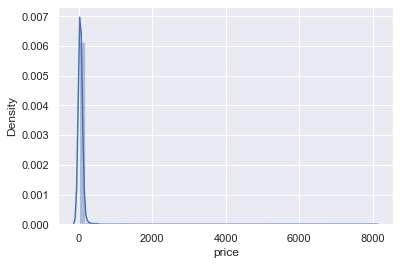

In [42]:
sns.distplot(thes['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

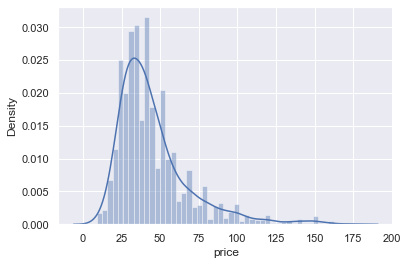

In [43]:
#briskoume apo to grafhma thn timh pou einai sto 99% kathws einai ektos oriwn
q = thes['price'].quantile(0.98)
data_1 = thes[thes.price < q].copy()


sns.distplot(data_1['price'])

C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logprice', ylabel='Density'>

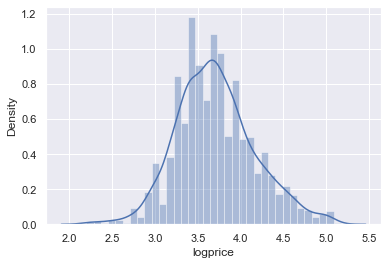

In [45]:
logprice = [math.log(x) for x in data_1['price']]
#ax = sns.violinplot(x="room_type", y="logprice" ,data=ath)
data_1['logprice']=logprice
sns.distplot(data_1['logprice'])

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

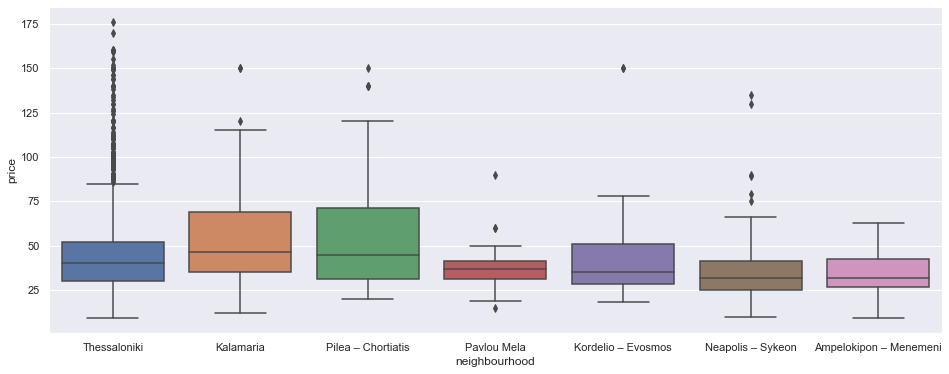

In [46]:
plt.figure(figsize=(16, 6))

sns.boxplot(x="neighbourhood", y="price", data=data_1)

In [47]:
#δεν χρειαζομασε το host_id,neighbourhood,longitude,latitude
data=greece.drop(['host_id','last_review','number_of_reviews','neighbourhood'],axis=1)

data.describe(include='all')

,id,latitude,longitude,room_type,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,top-10,NOMOS,logprice
count,29601.0,29601.000000,29601.000000,29601,29601.000000,29601.0,21907.000000,29601.000000,29601.000000,29601.000000,29601,29601.000000
unique,29601.0,NaN,NaN,4,NaN,58.0,NaN,NaN,NaN,NaN,6,NaN
top,24641534.0,NaN,NaN,Entire home/apt,NaN,1.0,NaN,NaN,NaN,NaN,ΑΤΤΙΚΗΣ,NaN
freq,1.0,NaN,NaN,26146,NaN,9175.0,NaN,NaN,NaN,NaN,9455,NaN
mean,NaN,36.626944,24.182535,NaN,123.787102,NaN,1.022158,14.261849,250.888112,7.573162,NaN,4.194017
std,NaN,1.700171,0.752269,NaN,471.061723,NaN,1.335910,32.484490,118.680398,10.412882,NaN,0.837741
min,NaN,34.834420,22.894960,NaN,8.000000,NaN,0.010000,1.000000,0.000000,0.003429,NaN,2.079442
25%,NaN,35.339410,23.727700,NaN,38.000000,NaN,0.180000,1.000000,174.000000,0.631737,NaN,3.637586
50%,NaN,35.512740,23.961870,NaN,57.000000,NaN,0.520000,3.000000,295.000000,2.247747,NaN,4.043051
75%,NaN,37.977910,24.590430,NaN,100.000000,NaN,1.270000,8.000000,362.000000,11.516122,NaN,4.605170


C:\Users\IOANNIS\anaconda3\envs\geo\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logprice', ylabel='Density'>

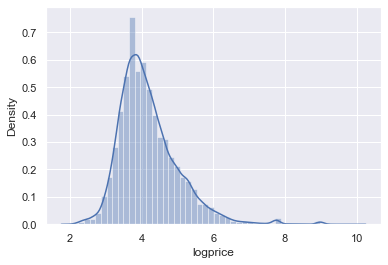

In [48]:

sns.distplot(greece['logprice'])

In [167]:
data['id'] = data['id'].astype('int')
data['minimum_nights'] = data['minimum_nights'].astype('int')

In [168]:
data_with_dummies = pd.get_dummies(data, drop_first=True)

In [169]:
data_with_dummies.head()

,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,top-10,logprice,room_type_Hotel room,room_type_Private room,room_type_Shared room,NOMOS_ΗΡΑΚΛΕΙΟΥ,NOMOS_ΘΕΣΣΑΛΟΝΙΚΗΣ,NOMOS_ΛΑΣΙΘΙΟΥ,NOMOS_ΡΕΘΥΜΝΗΣ,NOMOS_ΧΑΝΙΩΝ
0,10595,37.98863,23.76527,60.0,2,0.23,6,339,2.016581,4.094345,0,0,0,0,0,0,0,0
1,10990,37.98903,23.76448,36.0,1,0.41,6,151,1.964837,3.583519,0,0,0,0,0,0,0,0
2,10993,37.98888,23.76473,33.0,1,0.53,6,274,1.980157,3.496508,0,0,0,0,0,0,0,0
3,10995,37.98903,23.76448,36.0,1,0.18,6,154,1.964837,3.583519,0,0,0,0,0,0,0,0
4,27262,37.98924,23.76500,38.0,1,0.17,6,140,2.015571,3.637586,0,0,0,0,0,0,0,0


In [170]:
data_with_dummies.describe()

,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,top-10,logprice,room_type_Hotel room,room_type_Private room,room_type_Shared room,NOMOS_ΗΡΑΚΛΕΙΟΥ,NOMOS_ΘΕΣΣΑΛΟΝΙΚΗΣ,NOMOS_ΛΑΣΙΘΙΟΥ,NOMOS_ΡΕΘΥΜΝΗΣ,NOMOS_ΧΑΝΙΩΝ
count,2.960100e+04,29601.000000,29601.000000,29601.000000,29601.000000,21907.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,2.689202e+07,36.626944,24.182535,123.787102,3.331306,1.022158,14.261849,250.888112,7.573162,4.194017,0.022871,0.090774,0.003074,0.145502,0.082463,0.071687,0.119388,0.261545
std,1.240322e+07,1.700171,0.752269,471.061723,12.205423,1.335910,32.484490,118.680398,10.412882,0.837741,0.149494,0.287292,0.055361,0.352612,0.275074,0.257973,0.324250,0.439484
min,1.059500e+04,34.834420,22.894960,8.000000,1.000000,0.010000,1.000000,0.000000,0.003429,2.079442,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.801214e+07,35.339410,23.727700,38.000000,1.000000,0.180000,1.000000,174.000000,0.631737,3.637586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.737895e+07,35.512740,23.961870,57.000000,2.000000,0.520000,3.000000,295.000000,2.247747,4.043051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.711915e+07,37.977910,24.590430,100.000000,3.000000,1.270000,8.000000,362.000000,11.516122,4.605170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.606640e+07,40.688390,26.277830,20653.000000,1000.000000,14.210000,190.000000,365.000000,54.727854,9.935616,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [171]:
data_greece=data_with_dummies
data_greece_1=data_greece[(data_greece['price']<data_greece['price'].quantile(0.97))]
print(data_greece['price'].quantile(0.97))

411.0


In [172]:
import numpy as np
data_greece_1['reviews_per_month'].median()

0.53

In [173]:
import numpy as np
data_greece_1['reviews_per_month']=data_greece_1['reviews_per_month'].replace(np.nan, data_greece_1['reviews_per_month'].median())

<ipython-input-173-17657c4ebf0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_greece_1['reviews_per_month']=data_greece_1['reviews_per_month'].replace(np.nan, data_greece_1['reviews_per_month'].median())


In [174]:
from sklearn.preprocessing import StandardScaler
targets=data_greece_1['logprice']
inputs_s =data_greece_1[['top-10','reviews_per_month','longitude','latitude','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room',
                    'NOMOS_ΗΡΑΚΛΕΙΟΥ','NOMOS_ΘΕΣΣΑΛΟΝΙΚΗΣ','NOMOS_ΛΑΣΙΘΙΟΥ','NOMOS_ΡΕΘΥΜΝΗΣ','NOMOS_ΧΑΝΙΩΝ']]

scaler=StandardScaler()
scaler.fit(inputs_s)
inputs = scaler.transform(inputs_s)

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1, random_state=365)
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [176]:
y_pred_train=reg.predict(x_train)
y_pred_test=reg.predict(x_test)

In [177]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))



36.97208401201081
3789.7297484906426
61.560780928206576
0.2636314471849389
37.55533072094414
3833.9492599141063
61.91889259276288
0.2688674555128835


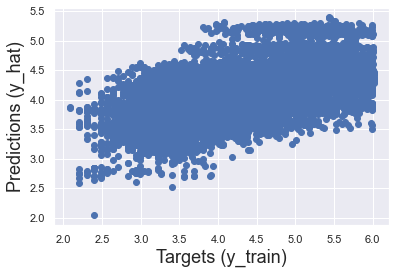

In [178]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [64]:
n=range(len(y_train_1))
suma=0
for i in n:
    dif=y_train_1[i]-y_pred_train_1[i]
    sqrd_dif=dif**2
    suma+=sqrd_dif
print(suma/(len(y_train_1)))

3789.7297484906762


In [114]:
## R2 adjusted 
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg.coef_)-1)))

0.2632037238155064
0.26502747366158563


# Decision tree 

In [66]:
##Decision tree 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import numpy as np
from sklearn.tree import DecisionTreeRegressor



x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1, random_state=365)
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [67]:
y_pred_train=tree.predict(x_train)
y_pred_test=tree.predict(x_test)

In [68]:
print(metrics.mean_absolute_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_train, y_pred_train))
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test, y_pred_test))
print(metrics.mean_squared_error(y_test, y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print(metrics.r2_score(y_test, y_pred_test))

0.000518962251240631
0.00012326785714927548
0.011102605872013808
0.9997397096718558
0.5013179111956981
0.46291403220501537
0.680377859872744
0.03422994081439701


# overfitting

In [69]:
#R2 adjusted 
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg.coef_)-1)))

0.9997395584809123
0.029157619074976826


# Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(n_estimators = 10, random_state = 0)
random.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [71]:
y_pred_train=random.predict(x_train)
y_pred_test=random.predict(x_test)

In [72]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]
print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

13.093991061570364
690.8620600582011
26.284254983891042
0.9038608029021246
31.15236732631986
2760.6273183699086
52.54167220759069
0.4640610114788699


In [73]:
#R2 adjusted
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg.coef_)-1)))

0.9038049599670073
0.46124620586688925


# Bayes

In [74]:
##bayes 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1, random_state=365)
bayes= linear_model.BayesianRidge()
# Fit the regression with the scaled TRAIN inputs and targets
bayes.fit(x_train,y_train)

BayesianRidge()

In [75]:
y_pred_train=bayes.predict(x_train)
y_pred_test=bayes.predict(x_test)

In [76]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

36.987081530897164
3795.624395956012
61.608638971787165
0.26326454689838774
37.559164642909785
3839.988163961843
61.967638037622855
0.26870655201859384


# classification

In [77]:
#xwrizw thn timi se 5 mh epikalyptomenes klaseis
data_greece['reviews_per_month']=data_greece['reviews_per_month'].replace(np.nan, data_greece['reviews_per_month'].median())
klasi=[]
a=data_greece['price'].quantile(0.20)
b=data_greece['price'].quantile(0.40)
c=data_greece['price'].quantile(0.60)
d=data_greece['price'].quantile(0.80)
print(a,b,c,d)
for i in data_greece['price']:
    if i <= a:
        klasi.append(1)
    elif i <= b:
        klasi.append(2)
    elif i <= c:
        klasi.append(3)
    elif i <= d:
        klasi.append(4)
    else :
        klasi.append(5)
data_greece['Κλάσεις τιμής']=klasi
data_greece.head()

35.0 49.0 70.0 120.0


,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,top-10,logprice,room_type_Hotel room,room_type_Private room,room_type_Shared room,NOMOS_ΗΡΑΚΛΕΙΟΥ,NOMOS_ΘΕΣΣΑΛΟΝΙΚΗΣ,NOMOS_ΛΑΣΙΘΙΟΥ,NOMOS_ΡΕΘΥΜΝΗΣ,NOMOS_ΧΑΝΙΩΝ,Κλάσεις τιμής
0,10595,37.98863,23.76527,60.0,2,0.23,6,339,2.016581,4.094345,0,0,0,0,0,0,0,0,3
1,10990,37.98903,23.76448,36.0,1,0.41,6,151,1.964837,3.583519,0,0,0,0,0,0,0,0,2
2,10993,37.98888,23.76473,33.0,1,0.53,6,274,1.980157,3.496508,0,0,0,0,0,0,0,0,1
3,10995,37.98903,23.76448,36.0,1,0.18,6,154,1.964837,3.583519,0,0,0,0,0,0,0,0,2
4,27262,37.98924,23.76500,38.0,1,0.17,6,140,2.015571,3.637586,0,0,0,0,0,0,0,0,2


In [78]:

# Decision tree classifier 
# importing necessary libraries 
from sklearn import datasets 
from sklearn.metrics import confusion_matrix , recall_score
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

y=data_greece['Κλάσεις τιμής']
X =data_greece[['top-10','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room',
                    'NOMOS_ΗΡΑΚΛΕΙΟΥ','NOMOS_ΘΕΣΣΑΛΟΝΙΚΗΣ','NOMOS_ΛΑΣΙΘΙΟΥ','NOMOS_ΡΕΘΥΜΝΗΣ','NOMOS_ΧΑΝΙΩΝ']]
# dividing X, y into train and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [80]:
y_pred = classifier.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[311 123 121  75  34]
 [138 169 144  84  41]
 [ 95 109 216 130  85]
 [ 65  78 118 145 100]
 [ 35  41  78 118 308]]


0.3880445795339412

In [82]:
print(precision_score(y_test, y_pred,average='weighted'))

0.3910441737900644


In [83]:
# Support vector machine) classifier 

from sklearn.metrics import confusion_matrix , accuracy_score

# training a linear SVM classifier 
from sklearn.svm import SVC 
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)
  
y_pred_SVM = classifier_SVM.predict(X_test)
  
# creating a confusion matrix 

cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
accuracy_score(y_test, y_pred_SVM)

[[458  11 140   0  55]
 [297   7 178   1  93]
 [236   2 225   1 171]
 [129   2 171   0 204]
 [ 69   0 159   2 350]]


0.3512326916582236

In [84]:
print(precision_score(y_test, y_pred_SVM,average='weighted'))

0.2820787767622259


In [85]:
# KNN (k-nearest neighbours) classifier

from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

knn_predictions = classifier_KNN.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[311 123 121  75  34]
 [138 169 144  84  41]
 [ 95 109 216 130  85]
 [ 65  78 118 145 100]
 [ 35  41  78 118 308]]


0.3880445795339412

In [86]:
print(precision_score(y_test, y_pred,average='weighted'))

0.3910441737900644


In [87]:
# Naive bayes classifier

# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# accuracy on X_test 
y_pred_NB = classifier_NB.predict(X_test)
  
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
accuracy_score(y_test, y_pred_NB)

[[297   4 173 176  14]
 [158   8 143 242  25]
 [120   3 153 323  36]
 [ 64   2  94 278  68]
 [ 34   1  65 282 198]]


0.3154339750084431

In [88]:
print(precision_score(y_test, y_pred_NB,average='weighted'))

0.38791989925036713


# crete regression

In [89]:
crete.head(5)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,NOMOS,galazia_paralia,top-10,logprice
0,31023,133208,Χανίων,35.51591,24.01751,Entire home/apt,39.0,2,266,2020-09-01,2.64,4,270,ΧΑΝΙΩΝ,1.030510,0.403887,3.663562
1,31789,136649,Κισσάμου,35.49762,23.69768,Entire home/apt,200.0,3,2,2012-09-23,0.02,1,365,ΧΑΝΙΩΝ,8.871771,13.664239,5.298317
2,81174,439663,Αποκορώνου,35.44785,24.19948,Entire home/apt,54.0,2,27,2020-09-09,0.24,5,213,ΧΑΝΙΩΝ,0.302180,18.041839,3.988984
3,89694,51279,Κισσάμου,35.41732,23.57061,Entire home/apt,165.0,7,1,2020-08-19,0.43,38,5,ΧΑΝΙΩΝ,21.166218,16.463070,5.105945
4,91859,495505,Πλατανιά,35.51504,23.91027,Hotel room,56.0,1,23,2019-08-27,0.21,7,217,ΧΑΝΙΩΝ,0.484437,9.963618,4.025352


In [90]:
crete['id'] = crete['id'].astype('int')
crete['minimum_nights'] = crete['minimum_nights'].astype('int')
crete['availability_365'] = crete['availability_365'].astype('int')
crete['reviews_per_month'] = crete['reviews_per_month'].astype('float')
crete['number_of_reviews'] = crete['number_of_reviews'].astype('int')
crete.drop('host_id', axis='columns', inplace=True)


In [91]:
crete.drop('last_review', axis='columns', inplace=True)

In [92]:
crete.drop('neighbourhood', axis='columns', inplace=True)

In [93]:

data_with_dummies_crete = pd.get_dummies(crete, drop_first=True)
data_with_dummies_crete['reviews_per_month']=data_with_dummies_crete['reviews_per_month'].replace(np.nan, data_with_dummies_crete['reviews_per_month'].median())

In [94]:
data_crete=data_with_dummies_crete[(data_with_dummies_crete['price']<data_with_dummies_crete['price'].quantile(0.98))]

#απλ΄ό γραμμικό μοντε΄λο για όλες τις μεταβλητές 
from sklearn.preprocessing import StandardScaler
targets_crete=data_crete['logprice']
inputs_c =data_crete[['top-10','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room',
                    'NOMOS_ΛΑΣΙΘΙΟΥ','NOMOS_ΡΕΘΥΜΝΗΣ','NOMOS_ΧΑΝΙΩΝ','galazia_paralia']]
scaler_crete = StandardScaler()
scaler_crete.fit(inputs_c)
inputs_crete = scaler_crete.transform(inputs_c)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(inputs_crete, targets_crete, test_size=0.1, random_state=365)
inputs_c.dtypes

top-10                            float64
reviews_per_month                 float64
calculated_host_listings_count      int32
availability_365                    int32
room_type_Hotel room                uint8
room_type_Private room              uint8
room_type_Shared room               uint8
NOMOS_ΛΑΣΙΘΙΟΥ                      uint8
NOMOS_ΡΕΘΥΜΝΗΣ                      uint8
NOMOS_ΧΑΝΙΩΝ                        uint8
galazia_paralia                   float64
dtype: object

In [95]:
reg_crete = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg_crete.fit(x_train,y_train)

y_pred_train=reg_crete.predict(x_train)
y_pred_test=reg_crete.predict(x_test)

In [96]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

56.12223921265858
9668.861728386744
98.33037032568699
0.1937002114914269
57.53099754165136
9601.2172992937
97.9858015188614
0.183463665866194


In [97]:
print(metrics.mean_absolute_error(y_test, y_pred_test))
print(metrics.mean_squared_error(y_test, y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print(metrics.r2_score(y_test, y_pred_test))

0.5289039104187058
0.4414853477308125
0.6644436377382302
0.183463665866194


In [98]:
## R2 adjusted 
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg_crete.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg_crete.coef_)-1)))

0.19308010013706545
0.177776819662128


In [99]:
from sklearn.ensemble import RandomForestRegressor
random_crete = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_crete.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [100]:
y_pred_train=random_crete.predict(x_train)
y_pred_test=random_crete.predict(x_test)

In [101]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

20.76228425837681
1993.6329895314118
44.65011746380307
0.887464911367741
47.78616289563339
7108.155958873991
84.30988055307628
0.3732224303912771


In [102]:
#R2 adjusted
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg.coef_)-1)))

0.8873567045517484
0.36775634693538706


# bayes crete

In [103]:
from sklearn import linear_model

In [104]:
bayes_crete= linear_model.BayesianRidge()
# Fit the regression with the scaled TRAIN inputs and targets
bayes_crete.fit(x_train,y_train)

BayesianRidge()

In [105]:
y_pred_train=bayes_crete.predict(x_train)
y_pred_test=bayes_crete.predict(x_test)

In [106]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

56.12018094353714
9670.542644304738
98.33891724187703
0.19369833942120218
57.52716510980432
9601.881395930337
97.98919019938035
0.1835053392721132


# # ridge algorithm crete

In [107]:
from sklearn.tree import DecisionTreeRegressor
tree_crete = DecisionTreeRegressor(random_state = 0)
tree_crete.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [108]:
y_pred_train=tree_crete.predict(x_train)
y_pred_test=tree_crete.predict(x_test)

In [109]:
print(metrics.mean_absolute_error(y_train, y_pred_train))
print(metrics.mean_squared_error(y_train, y_pred_train))
print(np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print(metrics.r2_score(y_train, y_pred_train))


print(metrics.mean_absolute_error(y_test, y_pred_test))
print(metrics.mean_squared_error(y_test, y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print(metrics.r2_score(y_test, y_pred_test))

0.00048813865270279784
0.00011913335793037558
0.010914822853824774
0.999777961463024
0.5633874858141641
0.5966340662644758
0.7724209126276138
-0.10348711636968377


# classification crete

In [110]:
#xwrizw thn timi se 5 mh epikalyptomenes klaseis
klasi_crete=[]
a=data_with_dummies_crete['price'].quantile(0.20)
b=data_with_dummies_crete['price'].quantile(0.40)
c=data_with_dummies_crete['price'].quantile(0.60)
d=data_with_dummies_crete['price'].quantile(0.80)
print(a,b,c,d)
for i in data_with_dummies_crete['price']:
    if i <= a:
        klasi_crete.append(1)
    elif i <= b:
        klasi_crete.append(2)
    elif i <= c:
        klasi_crete.append(3)
    elif i <= d:
        klasi_crete.append(4)
    else :
        klasi_crete.append(5)
data_with_dummies_crete['Κλάσεις τιμής']=klasi_crete
data_with_dummies_crete.head()

42.0 60.0 90.0 160.0


,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,galazia_paralia,top-10,logprice,room_type_Hotel room,room_type_Private room,room_type_Shared room,NOMOS_ΛΑΣΙΘΙΟΥ,NOMOS_ΡΕΘΥΜΝΗΣ,NOMOS_ΧΑΝΙΩΝ,Κλάσεις τιμής
0,31023,35.51591,24.01751,39.0,2,266,2.64,4,270,1.030510,0.403887,3.663562,0,0,0,0,0,1,1
1,31789,35.49762,23.69768,200.0,3,2,0.02,1,365,8.871771,13.664239,5.298317,0,0,0,0,0,1,5
2,81174,35.44785,24.19948,54.0,2,27,0.24,5,213,0.302180,18.041839,3.988984,0,0,0,0,0,1,2
3,89694,35.41732,23.57061,165.0,7,1,0.43,38,5,21.166218,16.463070,5.105945,0,0,0,0,0,1,5
4,91859,35.51504,23.91027,56.0,1,23,0.21,7,217,0.484437,9.963618,4.025352,1,0,0,0,0,1,2


In [111]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler


y=data_with_dummies_crete['Κλάσεις τιμής']
X =data_with_dummies_crete[['top-10','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room',
                    'NOMOS_ΛΑΣΙΘΙΟΥ','NOMOS_ΡΕΘΥΜΝΗΣ','NOMOS_ΧΑΝΙΩΝ']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

sc_crete = StandardScaler()
X_train = sc_crete.fit_transform(X_train)
X_test = sc_crete.transform(X_test)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm,X_train[1].shape)
accuracy_score(y_test, y_pred)

[[144  91  44  48  23]
 [104 131  61  47  32]
 [ 64  77 106  64  44]
 [ 42  43  64 111  71]
 [ 23  37  46  86 168]] (10,)


0.37267080745341613

# Support vector machine) classifier crete

In [112]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
from sklearn.svm import SVC
classifier_SVM_crete = SVC(kernel = 'linear', random_state = 0)
classifier_SVM_crete.fit(X_train, y_train)
  
y_pred_SVM_crete = classifier_SVM_crete.predict(X_test)
  
# creating a confusion matrix 

cm = confusion_matrix(y_test, y_pred_SVM_crete)
print(cm)
accuracy_score(y_test, y_pred_SVM_crete)

[[162 146   6  24  12]
 [129 187   3  48   8]
 [ 91 185   2  62  15]
 [ 60 144   6  72  49]
 [ 44 142   2  62 110]]


0.30095990965556185

# KNN (k-nearest neighbours) classifier crete

In [113]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN_crete = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN_crete.fit(X_train, y_train)

knn_predictions = classifier_KNN_crete.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print(cm)
accuracy_score(y_test, knn_predictions)

[[172  88  46  27  17]
 [121 119  68  37  30]
 [ 86  93  91  52  33]
 [ 46  62  62  97  64]
 [ 29  53  45  75 158]]


0.35968379446640314

# training a Naive Bayes classifier crete

In [114]:

from sklearn.naive_bayes import GaussianNB
classifier_NB_crete = GaussianNB()
classifier_NB_crete.fit(X_train, y_train)

# accuracy on X_test 
y_pred_NB_crete = classifier_NB_crete.predict(X_test)
  
cm = confusion_matrix(y_test, y_pred_NB_crete)
print(cm)
accuracy_score(y_test, y_pred_NB_crete)

[[ 14   1   0 216 119]
 [ 11   0   0 217 147]
 [  7   0   0 202 146]
 [  4   0   0 170 157]
 [  0   0   0 114 246]]


0.24280067758328627

# Regression Athens

In [115]:
athens.head(5)

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,metro,top-10,Δημοτικό Διαμέρισμα,NOMOS,logprice
0,10595,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,60.0,2,26,2020-10-06,0.23,6,339,0.544997,2.016581,7ο,ΑΤΤΙΚΗΣ,4.094345
1,10990,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,36.0,1,41,2020-09-30,0.41,6,151,0.487947,1.964837,7ο,ΑΤΤΙΚΗΣ,3.583519
2,10993,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76473,Entire home/apt,33.0,1,52,2020-10-19,0.53,6,274,0.507813,1.980157,7ο,ΑΤΤΙΚΗΣ,3.496508
3,10995,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98903,23.76448,Entire home/apt,36.0,1,23,2020-10-03,0.18,6,154,0.487947,1.964837,7ο,ΑΤΤΙΚΗΣ,3.583519
4,27262,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98924,23.76500,Entire home/apt,38.0,1,17,2020-01-08,0.17,6,140,0.473456,2.015571,7ο,ΑΤΤΙΚΗΣ,3.637586


In [116]:
athens['id'] = athens['id'].astype('int')
athens['minimum_nights'] = athens['minimum_nights'].astype('int')
athens['availability_365'] = athens['availability_365'].astype('int')
athens['reviews_per_month'] = athens['reviews_per_month'].astype('float')

athens.drop('neighbourhood', axis='columns', inplace=True)
athens.drop('NOMOS', axis='columns', inplace=True)
athens.drop('host_id', axis='columns', inplace=True)
athens.drop('number_of_reviews', axis='columns', inplace=True)
athens.drop('last_review', axis='columns', inplace=True)

In [117]:
data_with_dummies_athens = pd.get_dummies(athens, drop_first=True)
data_with_dummies_athens.head(4)

,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,metro,top-10,logprice,room_type_Hotel room,room_type_Private room,room_type_Shared room,Δημοτικό Διαμέρισμα_2ο,Δημοτικό Διαμέρισμα_3ο,Δημοτικό Διαμέρισμα_4ο,Δημοτικό Διαμέρισμα_5ο,Δημοτικό Διαμέρισμα_6ο,Δημοτικό Διαμέρισμα_7ο
0,10595,37.98863,23.76527,60.0,2,0.23,6,339,0.544997,2.016581,4.094345,0,0,0,0,0,0,0,0,1
1,10990,37.98903,23.76448,36.0,1,0.41,6,151,0.487947,1.964837,3.583519,0,0,0,0,0,0,0,0,1
2,10993,37.98888,23.76473,33.0,1,0.53,6,274,0.507813,1.980157,3.496508,0,0,0,0,0,0,0,0,1
3,10995,37.98903,23.76448,36.0,1,0.18,6,154,0.487947,1.964837,3.583519,0,0,0,0,0,0,0,0,1


In [118]:
data_athens=data_with_dummies_athens[(data_with_dummies_athens['price']<data_with_dummies_athens['price'].quantile(0.98))]
data_athens['reviews_per_month']=data_athens['reviews_per_month'].replace(np.nan, 0)
#απλ΄ό γραμμικό μοντε΄λο
from sklearn.preprocessing import StandardScaler
targets=data_athens['logprice']
inputs_s =data_athens[['Δημοτικό Διαμέρισμα_2ο','Δημοτικό Διαμέρισμα_3ο','Δημοτικό Διαμέρισμα_4ο','Δημοτικό Διαμέρισμα_5ο','Δημοτικό Διαμέρισμα_6ο','Δημοτικό Διαμέρισμα_7ο','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room','metro','top-10']]
scaler_athens=StandardScaler()
scaler_athens.fit(inputs_s)
inputs = scaler_athens.transform(inputs_s)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.1, random_state=365)
reg_athens = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg_athens.fit(x_train,y_train)


y_pred_train=reg_athens.predict(x_train)
y_pred_test=reg_athens.predict(x_test)


y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))



20.266553173852277
1002.5502128585298
31.66307333248827
0.21072635482327784
19.23930771861049
863.1747129482459
29.37983514161109
0.23777804348308462


<ipython-input-118-b053a8994a07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_athens['reviews_per_month']=data_athens['reviews_per_month'].replace(np.nan, 0)


In [119]:
print(metrics.mean_absolute_error(y_test, y_pred_test))
print(metrics.mean_squared_error(y_test, y_pred_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
print(metrics.r2_score(y_test, y_pred_test))


0.3736912682742449
0.22708784676883886
0.47653735086437754
0.23777804348308462


In [120]:
## R2 adjusted 
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg_athens.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg_athens.coef_)-1)))


0.2093032144605359
0.22524149814563532


# random forest Athens

In [121]:
from sklearn.ensemble import RandomForestRegressor
random_athens = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_athens.fit(x_train, y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [122]:

y_pred_train=random_athens.predict(x_train)
y_pred_test=random_athens.predict(x_test)

In [123]:

y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))


8.139779699164945
217.4957333901558
14.747736551422248
0.8719902650262239
18.447879475733213
783.7372036598836
27.99530681489102
0.31253680097851766


# Bayes Athens

In [124]:
bayes_athens= linear_model.BayesianRidge()
# Fit the regression with the scaled TRAIN inputs and targets
bayes_athens.fit(x_train,y_train)

BayesianRidge()

In [125]:
y_pred_train=bayes_athens.predict(x_train)
y_pred_test=bayes_athens.predict(x_test)

In [126]:

y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

20.267890723001514
1002.98539409486
31.66994464938106
0.21071569680526048
19.238286195543928
863.5808670700814
29.386746452611614
0.23780495875611873


# Classification Athens

In [127]:
#xwrizw thn timi se 5 mh epikalyptomenes klaseis
klasi_athens=[]
a=data_athens['price'].quantile(0.20)
b=data_athens['price'].quantile(0.40)
c=data_athens['price'].quantile(0.60)
d=data_athens['price'].quantile(0.80)
print(a,b,c,d)
for i in data_athens['price']:
    if i <= a:
        klasi_athens.append(1)
    elif i <= b:
        klasi_athens.append(2)
    elif i <= c:
        klasi_athens.append(3)
    elif i <= d:
        klasi_athens.append(4)
    else :
        klasi_athens.append(5)
data_athens['Κλάσεις τιμής']=klasi_athens
data_athens.head()

28.0 38.0 50.0 70.0


<ipython-input-127-f5e98e8c04dd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_athens['Κλάσεις τιμής']=klasi_athens


,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,metro,top-10,...,room_type_Hotel room,room_type_Private room,room_type_Shared room,Δημοτικό Διαμέρισμα_2ο,Δημοτικό Διαμέρισμα_3ο,Δημοτικό Διαμέρισμα_4ο,Δημοτικό Διαμέρισμα_5ο,Δημοτικό Διαμέρισμα_6ο,Δημοτικό Διαμέρισμα_7ο,Κλάσεις τιμής
0,10595,37.98863,23.76527,60.0,2,0.23,6,339,0.544997,2.016581,...,0,0,0,0,0,0,0,0,1,4
1,10990,37.98903,23.76448,36.0,1,0.41,6,151,0.487947,1.964837,...,0,0,0,0,0,0,0,0,1,2
2,10993,37.98888,23.76473,33.0,1,0.53,6,274,0.507813,1.980157,...,0,0,0,0,0,0,0,0,1,2
3,10995,37.98903,23.76448,36.0,1,0.18,6,154,0.487947,1.964837,...,0,0,0,0,0,0,0,0,1,2
4,27262,37.98924,23.76500,38.0,1,0.17,6,140,0.473456,2.015571,...,0,0,0,0,0,0,0,0,1,2


In [128]:
X =data_athens[['Δημοτικό Διαμέρισμα_2ο','Δημοτικό Διαμέρισμα_3ο','Δημοτικό Διαμέρισμα_4ο','Δημοτικό Διαμέρισμα_5ο','Δημοτικό Διαμέρισμα_6ο','Δημοτικό Διαμέρισμα_7ο','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room','metro','top-10']]
y= data_athens['Κλάσεις τιμής']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

sc_athens = StandardScaler()
X_train = sc_athens.fit_transform(X_train)
X_test = sc_athens.transform(X_test)

# DescisionTreeClassifier  Athens

In [129]:
from sklearn.tree import DecisionTreeClassifier
classifier_athens = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_athens.fit(X_train, y_train)

y_pred = classifier_athens.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[80 28 44 24  7]
 [49 53 45 34 25]
 [33 49 59 40 31]
 [12 28 41 33 34]
 [22 24 37 36 59]]


0.3063646170442287


# Support vector machine) classifier Athens

In [130]:
from sklearn.svm import SVC 
from sklearn.svm import SVC
classifier_SVM_athens = SVC(kernel = 'linear', random_state = 0)
classifier_SVM_athens.fit(X_train, y_train)
  
y_pred_SVM = classifier_SVM_athens.predict(X_test)
  
# creating a confusion matrix 

cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
accuracy_score(y_test, y_pred_SVM)

[[ 74  32  59   0  18]
 [ 33  40  99   0  34]
 [ 22  34  99   0  57]
 [ 11  11  57   0  69]
 [ 10  13  53   0 102]]


0.33980582524271846

# KNN (k-nearest neighbours) classifier Athens

In [131]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN_athens = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN_athens.fit(X_train, y_train)

knn_predictions = classifier_KNN_athens.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[80 28 44 24  7]
 [49 53 45 34 25]
 [33 49 59 40 31]
 [12 28 41 33 34]
 [22 24 37 36 59]]


0.3063646170442287

# Naive bayes classifier

In [132]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# accuracy on X_test 
y_pred_NB = classifier_NB.predict(X_test)
  
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
accuracy_score(y_test, y_pred_NB)


[[ 24  10   0 147   2]
 [ 15   8   0 183   0]
 [  9  10   0 191   2]
 [  1   4   0 142   1]
 [  4   4   0 163   7]]


0.19525350593311758

In [133]:
thes.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Μουσεία,top-10,NOMOS,logprice
0,35261,Home in the heart of Thessaloniki,151631,Cathy,NaN,Thessaloniki,40.63777,22.94934,Entire home/apt,25.0,2,45,2020-10-13,0.40,2,10,0.213516,0.183535,ΘΕΣΣΑΛΟΝΙΚΗΣ,3.218876
1,152991,Design space downtown Thessaloniki,735568,G,NaN,Thessaloniki,40.64106,22.94240,Entire home/apt,48.0,5,263,2020-03-09,2.45,1,297,0.477813,0.516186,ΘΕΣΣΑΛΟΝΙΚΗΣ,3.871201
2,176307,Nikolas apartment @ city's heart (2BD),663967,Nikolas,NaN,Thessaloniki,40.63416,22.94606,Entire home/apt,46.0,4,190,2019-10-21,1.76,1,173,0.309694,0.433884,ΘΕΣΣΑΛΟΝΙΚΗΣ,3.828641
3,218831,Sea-life apartment,137588,Dimitrios,NaN,Kalamaria,40.57187,22.95678,Entire home/apt,55.0,2,1,2020-02-02,0.11,1,364,3.934709,4.761306,ΘΕΣΣΑΛΟΝΙΚΗΣ,4.007333
4,483128,Stel's apt in Thessaloniki center!,2358521,Stelios,NaN,Thessaloniki,40.63765,22.94979,Entire home/apt,25.0,1,312,2020-09-30,3.05,1,357,0.252290,0.219787,ΘΕΣΣΑΛΟΝΙΚΗΣ,3.218876


In [134]:
thes['id'] = thes['id'].astype('int')
thes['minimum_nights'] = thes['minimum_nights'].astype('int')
thes['availability_365'] = thes['availability_365'].astype('int')
thes['reviews_per_month'] = thes['reviews_per_month'].astype('float')

thes.drop('neighbourhood_group', axis='columns', inplace=True)
thes.drop('name', axis='columns', inplace=True)
thes.drop('NOMOS', axis='columns', inplace=True)
thes.drop('host_id', axis='columns', inplace=True)
thes.drop('number_of_reviews', axis='columns', inplace=True)
thes.drop('last_review', axis='columns', inplace=True)

In [135]:
thes.drop('host_name', axis='columns', inplace=True)
data_with_dummies_thes = pd.get_dummies(thes, drop_first=True)
data_with_dummies_thes.head()

,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Μουσεία,top-10,logprice,neighbourhood_Kalamaria,neighbourhood_Kordelio – Evosmos,neighbourhood_Neapolis – Sykeon,neighbourhood_Pavlou Mela,neighbourhood_Pilea – Chortiatis,neighbourhood_Thessaloniki,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,35261,40.63777,22.94934,25.0,2,0.40,2,10,0.213516,0.183535,3.218876,0,0,0,0,0,1,0,0,0
1,152991,40.64106,22.94240,48.0,5,2.45,1,297,0.477813,0.516186,3.871201,0,0,0,0,0,1,0,0,0
2,176307,40.63416,22.94606,46.0,4,1.76,1,173,0.309694,0.433884,3.828641,0,0,0,0,0,1,0,0,0
3,218831,40.57187,22.95678,55.0,2,0.11,1,364,3.934709,4.761306,4.007333,1,0,0,0,0,0,0,0,0
4,483128,40.63765,22.94979,25.0,1,3.05,1,357,0.252290,0.219787,3.218876,0,0,0,0,0,1,0,0,0


In [147]:
from sklearn.preprocessing import StandardScaler
data_thes=data_with_dummies_thes[(data_with_dummies_thes['price']<data_with_dummies_thes['price'].quantile(0.97))]
data_with_dummies_thes['reviews_per_month']=data_with_dummies_thes['reviews_per_month'].replace(np.nan, 0)
data_thes['reviews_per_month']=data_thes['reviews_per_month'].replace(np.nan, 0)
targets_thes=data_thes['logprice']
inputs_s_thes =data_thes[['top-10','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room','Μουσεία']]
scaler_thes=StandardScaler()
scaler_thes.fit(inputs_s_thes)
inputs = scaler_thes.transform(inputs_s_thes)

<ipython-input-147-609109d94b96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_thes['reviews_per_month']=data_thes['reviews_per_month'].replace(np.nan, 0)


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(inputs, targets_thes, test_size=0.1, random_state=365)
reg_thes = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg_thes.fit(x_train,y_train)

LinearRegression()

In [149]:
y_pred_train=reg_thes.predict(x_train)
y_pred_test=reg_thes.predict(x_test)

In [150]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))
## R2 adjusted 
print(1-(1-metrics.r2_score(y_train, y_pred_train))*(len(x_train)/(len(x_train)-len(reg_thes.coef_)-1)))
print(1-(1-metrics.r2_score(y_test, y_pred_test))*(len(x_test)/(len(x_test)-len(reg_thes.coef_)-1)))


14.208231203262088
420.7050673190082
20.511096199837983
0.10322759250618374
13.673092263480195
395.6314695381306
19.890486910534158
0.14860359980667048
0.09941514485977632
0.11499584716746014


# Random Forest Thes

In [151]:
from sklearn.ensemble import RandomForestRegressor
random_thes = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_thes.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [152]:
y_pred_train=random_thes.predict(x_train)
y_pred_test=random_thes.predict(x_test)

In [153]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

5.706118263847031
88.34854972529105
9.399390923101935
0.8472315115787221
12.995808131646356
369.4254967217192
19.220444758686497
0.2059205323191241


# Bayes Thes

In [154]:
bayes_thes= linear_model.BayesianRidge()
# Fit the regression with the scaled TRAIN inputs and targets
bayes_thes.fit(x_train,y_train)

BayesianRidge()

In [155]:
y_pred_train=bayes_thes.predict(x_train)
y_pred_test=bayes_thes.predict(x_test)

In [156]:
y_train_1 = [math.exp(x) for x in y_train]
y_pred_train_1 = [math.exp(x) for x in y_pred_train]
y_test_1 = [math.exp(x) for x in y_test]
y_pred_test_1 = [math.exp(x) for x in y_pred_test]

print(metrics.mean_absolute_error(y_train_1, y_pred_train_1))
print(metrics.mean_squared_error(y_train_1, y_pred_train_1))
print(np.sqrt(metrics.mean_squared_error(y_train_1, y_pred_train_1)))
print(metrics.r2_score(y_train, y_pred_train))

print(metrics.mean_absolute_error(y_test_1, y_pred_test_1))
print(metrics.mean_squared_error(y_test_1, y_pred_test_1))
print(np.sqrt(metrics.mean_squared_error(y_test_1, y_pred_test_1)))
print(metrics.r2_score(y_test, y_pred_test))

14.213644782231341
421.2828521324462
20.525176056064566
0.10305789700439372
13.672287469821406
396.8844994330826
19.921960230687205
0.14686140022067729


# Classification Thes

In [194]:
#xwrizw thn timi se 5 mh epikalyptomenes klaseis
klasi_thes=[]
a=data_with_dummies_thes['price'].quantile(0.20)
b=data_with_dummies_thes['price'].quantile(0.40)
c=data_with_dummies_thes['price'].quantile(0.60)
d=data_with_dummies_thes['price'].quantile(0.80)
print(a,b,c,d)
for i in data_with_dummies_thes['price']:
    if i <= a:
        klasi_thes.append(1)
    elif i <= b:
        klasi_thes.append(2)
    elif i <= c:
        klasi_thes.append(3)
    elif i <= d:
        klasi_thes.append(4)
    else :
        klasi_thes.append(5)
data_with_dummies_thes['Κλάσεις τιμής']=klasi_thes
data_thes.head(5)

29.0 36.0 45.0 60.0


,id,latitude,longitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365,Μουσεία,top-10,logprice,neighbourhood_Kalamaria,neighbourhood_Kordelio – Evosmos,neighbourhood_Neapolis – Sykeon,neighbourhood_Pavlou Mela,neighbourhood_Pilea – Chortiatis,neighbourhood_Thessaloniki,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,35261,40.63777,22.94934,25.0,2,0.40,2,10,0.213516,0.183535,3.218876,0,0,0,0,0,1,0,0,0
1,152991,40.64106,22.94240,48.0,5,2.45,1,297,0.477813,0.516186,3.871201,0,0,0,0,0,1,0,0,0
2,176307,40.63416,22.94606,46.0,4,1.76,1,173,0.309694,0.433884,3.828641,0,0,0,0,0,1,0,0,0
3,218831,40.57187,22.95678,55.0,2,0.11,1,364,3.934709,4.761306,4.007333,1,0,0,0,0,0,0,0,0
4,483128,40.63765,22.94979,25.0,1,3.05,1,357,0.252290,0.219787,3.218876,0,0,0,0,0,1,0,0,0


In [195]:
y=data_with_dummies_thes['Κλάσεις τιμής']
X =data_with_dummies_thes[['top-10','reviews_per_month','calculated_host_listings_count','availability_365','room_type_Hotel room','room_type_Private room','room_type_Shared room','Μουσεία',
                    'neighbourhood_Kalamaria','neighbourhood_Kordelio – Evosmos','neighbourhood_Neapolis – Sykeon','neighbourhood_Pavlou Mela','neighbourhood_Pilea – Chortiatis','neighbourhood_Thessaloniki']]
# dividing X, y into train and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [199]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[27  9  8  4  6]
 [ 8 19 18  3  5]
 [10 10 10 10 10]
 [ 5  9 12  9 13]
 [ 7  6  4 13 10]]


0.30612244897959184

In [198]:
# Support vector machine) classifier 

from sklearn.metrics import confusion_matrix , accuracy_score

# training a linear SVM classifier 
from sklearn.svm import SVC 
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)
  
y_pred_SVM = classifier_SVM.predict(X_test)
cm = confusion_matrix(y_test, y_pred_SVM)
print(cm)
accuracy_score(y_test, y_pred_SVM)


[[25  4 13  0 12]
 [13  2 14  0 24]
 [ 4  4 11  0 31]
 [ 5  3  7  0 33]
 [ 5  2  2  0 31]]


0.2816326530612245

In [201]:
# KNN (k-nearest neighbours) classifier

from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train, y_train)

knn_predictions = classifier_KNN.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions)
print(cm)
accuracy_score(y_test, knn_predictions)

[[33 11  6  3  1]
 [16 13 10  8  6]
 [15  6  6 11 12]
 [ 9 11  5 17  6]
 [ 9  6  5  6 14]]


0.33877551020408164

In [164]:

# Naive bayes classifier

# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# accuracy on X_test 
y_pred_NB = classifier_NB.predict(X_test)
  
cm = confusion_matrix(y_test, y_pred_NB)
print(cm)
accuracy_score(y_test, y_pred_NB)


[[14  1 39  0  0]
 [ 6  0 44  0  3]
 [ 5  1 41  0  3]
 [ 1  0 43  0  4]
 [ 4  0 26  0 10]]


0.2653061224489796